In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# Preprocessing

In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


# EDA

In [7]:
import matplotlib.pyplot as plt

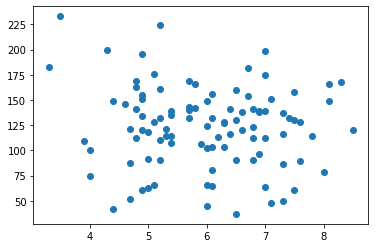

In [8]:
plt.scatter(df.cgpa,df.iq)

# Yellow ones are placed ones

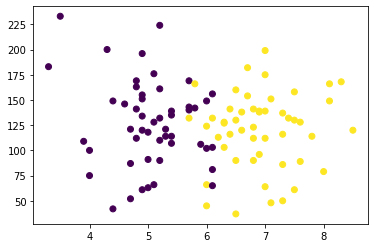

In [9]:
plt.scatter(df.cgpa,df.iq,c=df.placement)

# Extracting feature columns

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

# Scaling values to be between 0 and 1

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

# as we have learned pattern dont need to use fit

In [18]:
X_test = scaler.transform(X_test)

# Training Model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
cls = LogisticRegression()

In [21]:
cls.fit(X_train,y_train)

LogisticRegression()

# Predicting

In [36]:
X_test

array([[-0.5858817 , -0.05264484],
       [-0.92497721,  0.26983924],
       [ 0.51617873,  0.36906511],
       [ 0.77050037,  0.39387157],
       [ 0.68572649,  0.44348451],
       [ 0.00753546,  0.64193625],
       [-0.24678618,  1.13806559],
       [-0.50110782, -0.39993538],
       [ 0.43140485, -2.13638809],
       [-0.1620123 ,  0.46829098]])

In [22]:
cls.predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [23]:
y_test

2     0
40    0
48    1
60    1
43    1
33    0
84    0
81    0
82    1
4     0
Name: placement, dtype: int64

# Calculating Accuracy Score

In [24]:
y_pred = cls.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.9

# Plotting Decision Boundary

In [27]:
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

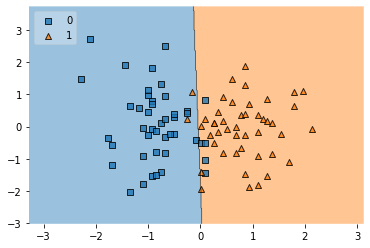

In [29]:
plot_decision_regions(X_train,y_train.values,clf=cls,legend=2)

# Saving Model

In [31]:
import pickle

In [33]:
pickle.dump(cls,open("model.pkl","wb"))